In [2]:
library('igraph')
library('repr')

Warning message:
"package 'igraph' was built under R version 3.4.4"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'repr' was built under R version 3.4.4"

In [1]:
df <-read.delim("data/edgelist.txt",header=FALSE)
g <- graph.data.frame(df, directed = TRUE)

E(g)$weight <- df[,"V3"]

In [3]:
is_weighted(g)

[1] TRUE

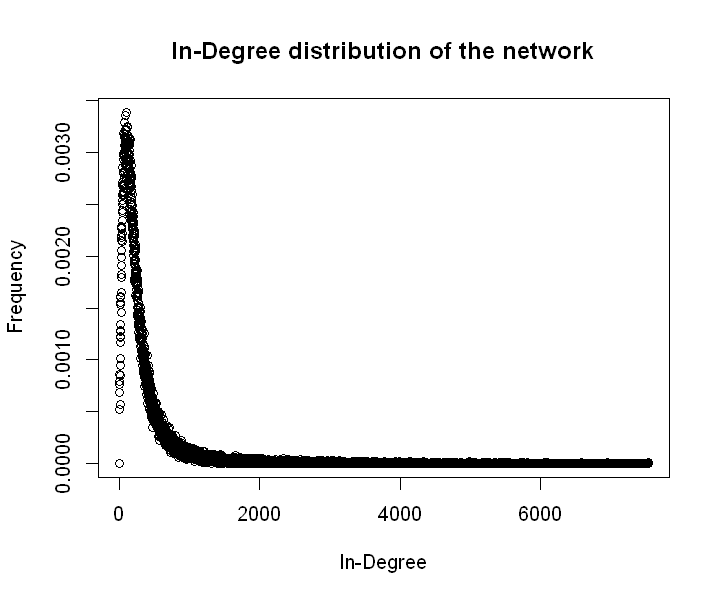

In [3]:
deg <- degree.distribution(g,mode="in")
options(repr.plot.width=6,repr.plot.height=5)
plot(deg,main="In-Degree distribution of the network",xlab="In-Degree",ylab="Frequency")

In [4]:
vcount(g)

[1] 113050

In [5]:
ecount(g)

[1] 35479418

In [23]:
vlist3 = c("Cruise, Tom", "Watson, Emma (II)", "Clooney, George", "Hanks, Tom", 
         "Johnson, Dwayne (I)", "Depp, Johnny", "Smith, Will (I)", "Streep, Meryl",
         "DiCaprio, Leonardo", "Pitt, Brad")
vlist3

[1] "Cruise, Tom"         "Watson, Emma (II)"   "Clooney, George"    
 [4] "Hanks, Tom"          "Johnson, Dwayne (I)" "Depp, Johnny"       
 [7] "Smith, Will (I)"     "Streep, Meryl"       "DiCaprio, Leonardo" 
[10] "Pitt, Brad"

In [40]:
head(df)

V1,V2,V3
"Mielke, Karsten","Sellien, Rainer",0.090909
"Mielke, Karsten","Assor, Adolfo (I)",0.090909
"Mielke, Karsten","Marti, Beat",0.181818
"Mielke, Karsten","Schofield, David (I)",0.090909
"Mielke, Karsten","Heynert, Josef",0.090909
"Mielke, Karsten","Melville, Johnny",0.090909


In [9]:
getpair <- function(df,v){
    tempdf = df[df$V1==v,]
    maxval = max(tempdf$V3)
    maxrow = which(tempdf$V3==maxval)
    print(tempdf[maxrow,])
}

In [66]:
for(v in vlist3){
    getpair(df,v)
}

                  V1             V2       V3
20199438 Cruise, Tom Kidman, Nicole 0.174603
                        V1                V2   V3
23119732 Watson, Emma (II) Radcliffe, Daniel 0.52
                      V1          V2       V3
35449186 Clooney, George Damon, Matt 0.119403
                V1             V2       V3
9282535 Hanks, Tom Allen, Tim (I) 0.101266
                         V1                 V2       V3
5005285 Johnson, Dwayne (I) Austin, Steve (IV) 0.205128
5005546 Johnson, Dwayne (I) Levesque, Paul (I) 0.205128
5006046 Johnson, Dwayne (I)      Calaway, Mark 0.205128
                   V1                    V2       V3
28718179 Depp, Johnny Bonham Carter, Helena 0.081633
                      V1              V2       V3
23402237 Smith, Will (I) Foster, Darrell 0.122449
                    V1               V2       V3
34290501 Streep, Meryl Kline, Kevin (I) 0.061856
34290837 Streep, Meryl  De Niro, Robert 0.061856
                        V1               V2       V3
43

In [58]:
pr = page_rank(g,directed=TRUE,vids = V(g))
sortedPR = sort(pr$vector, decreasing=TRUE, )

top10 = sortedPR[1:10]
top10

Flowers, Bess    Tatasciore, Fred    Harris, Sam (II)    Blum, Steve (IX) 
       0.0002351274        0.0001989509        0.0001971985        0.0001954904 
 Miller, Harold (I)         Jeremy, Ron     Phelps, Lee (I)     Lowenthal, Yuri 
       0.0001727117        0.0001585655        0.0001573129        0.0001567284 
Downes, Robin Atkin O'Connor, Frank (I) 
       0.0001517743        0.0001469485

In [32]:
save.image()

In [33]:
ls()

[1] "df"       "g"        "pr"       "sortedPR"

In [91]:
vlist4 = c()
for(i in 1:length(top10)){
    vlist4[i] = which(pr$vector==top10[i])
}

vlist4

[1] 59416 44703 10927 41503 21890  5907 81883 82023 66847 64385

In [92]:
degree(g,v=vlist4,mode="in")

Flowers, Bess    Tatasciore, Fred    Harris, Sam (II)    Blum, Steve (IX) 
               7537                3954                6960                3316 
 Miller, Harold (I)         Jeremy, Ron     Phelps, Lee (I)     Lowenthal, Yuri 
               6587                2905                5563                2662 
Downes, Robin Atkin O'Connor, Frank (I) 
               2953                5502

In [24]:
for(i in 1:length(vlist3)){
    print(pr$vector[vlist3[i]])
}

 Cruise, Tom 
3.974651e-05 
Watson, Emma (II) 
     1.748531e-05 
Clooney, George 
   4.002942e-05 
  Hanks, Tom 
5.104905e-05 
Johnson, Dwayne (I) 
       4.201889e-05 
Depp, Johnny 
5.381221e-05 
Smith, Will (I) 
   3.201644e-05 
Streep, Meryl 
 3.961076e-05 
DiCaprio, Leonardo 
      3.168002e-05 
  Pitt, Brad 
4.297555e-05 


In [9]:
degree(g,v=vlist3,mode="in")

Cruise, Tom   Watson, Emma (II)     Clooney, George          Hanks, Tom 
               1651                 453                1573                2064 
Johnson, Dwayne (I)        Depp, Johnny     Smith, Will (I)       Streep, Meryl 
               1357                2144                1319                1594 
 DiCaprio, Leonardo          Pitt, Brad 
               1301                1739